In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [23]:
filepath = 'E:\Rnw\python\py_labwork\py_test\maths\exam\household_dataset_150rows.csv'
df = pd.read_csv(filepath)

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\parth\AppData\Local\Temp\ipykernel_27108\1939663772.py:1: SyntaxWarning: invalid escape sequence '\R'
  filepath = 'E:\Rnw\python\py_labwork\py_test\maths\exam\household_dataset_150rows.csv'


In [24]:
df.head(10)

,Household_ID,Age_of_Household_Head,Household_Income,Education_Level,Family_Size,Owns_House,Urban_Rural
0,H1000,58,103806,Post-Grad,5,Yes,Rural
1,H1001,71,142982,Post-Grad,7,No,Rural
2,H1002,48,115989,Graduate,4,No,Urban
3,H1003,34,95982,Graduate,6,Yes,Urban
4,H1004,62,126626,Secondary,4,Yes,Urban
5,H1005,27,124176,Graduate,3,Yes,Urban
6,H1006,40,136278,Secondary,7,No,Rural
7,H1007,58,127409,Secondary,8,Yes,Urban
8,H1008,38,28419,Secondary,4,No,Rural
9,H1009,42,55015,Secondary,2,No,Urban


In [29]:
print(df.dtypes)

Household_ID             object
Age_of_Household_Head     int64
Household_Income          int64
Education_Level          object
Family_Size               int64
Owns_House               object
Urban_Rural              object
dtype: object


In [30]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64']).columns

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)


Categorical: Index(['Household_ID', 'Education_Level', 'Owns_House', 'Urban_Rural'], dtype='object')
Numerical: Index(['Age_of_Household_Head', 'Household_Income', 'Family_Size'], dtype='object')


In [31]:
mean_income = df['Household_Income'].mean()
median_income = df['Household_Income'].median()
mode_income = df['Household_Income'].mode()[0]

mean_age = df["Age_of_Household_Head"].mean()
median_age = df["Age_of_Household_Head"].median()
mode_age = df["Age_of_Household_Head"].mode()[0]

print(mean_income, median_income, mode_income)
print(mean_age, median_age, mode_age)


84561.72 94564.5 7693
46.70666666666666 45.5 43


In [32]:
print(df["Household_Income"].describe())


count       150.000000
mean      84561.720000
std       42357.006859
min        7693.000000
25%       48704.750000
50%       94564.500000
75%      122832.750000
max      148946.000000
Name: Household_Income, dtype: float64


IN Household_Income Mean Median does  vary to much from mode but its not same for Age_of_Household_Head which means which means high welth disparitity on same age level

In [33]:
range_income = df["Household_Income"].max() - df["Household_Income"].min()
variance_income = df["Household_Income"].var()
std_income = df["Household_Income"].std()

print(range_income, variance_income, std_income)


141253 1794116030.0553021 42357.006859022775


In [34]:
Q1 = df["Household_Income"].quantile(0.25)
Q3 = df["Household_Income"].quantile(0.75)
IQR = Q3 - Q1

print("IQR:", IQR)


IQR: 74128.0


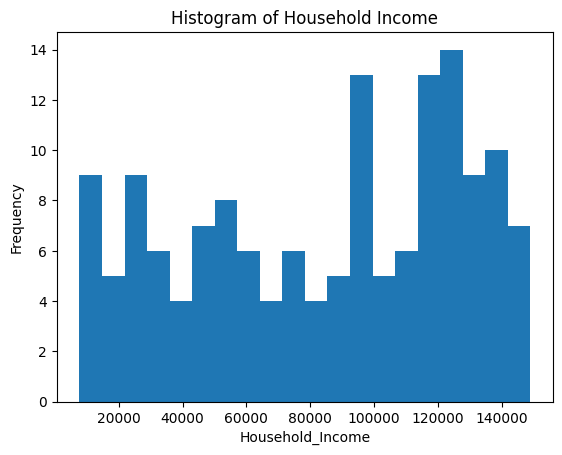

In [35]:
plt.hist(df["Household_Income"], bins=20)
plt.xlabel("Household_Income")
plt.ylabel("Frequency")
plt.title("Histogram of Household Income")
plt.show()


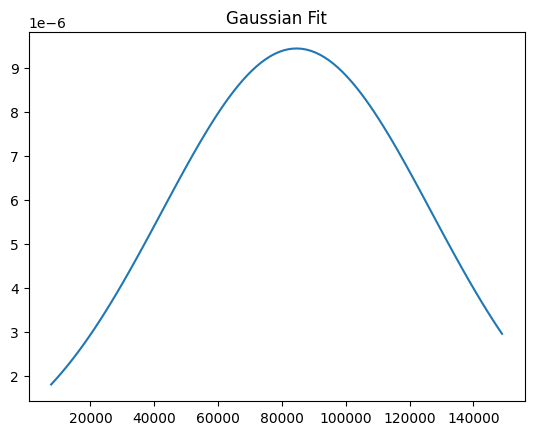

In [36]:
mu, sigma = stats.norm.fit(df["Household_Income"])
x = np.linspace(df["Household_Income"].min(), df["Household_Income"].max(), 100)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.title("Gaussian Fit")
plt.show()


In [38]:
skewness = df["Household_Income"].skew()
kurtosis = df["Household_Income"].kurt()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Skewness: -0.28270806637393575
Kurtosis: -1.2447280547035033


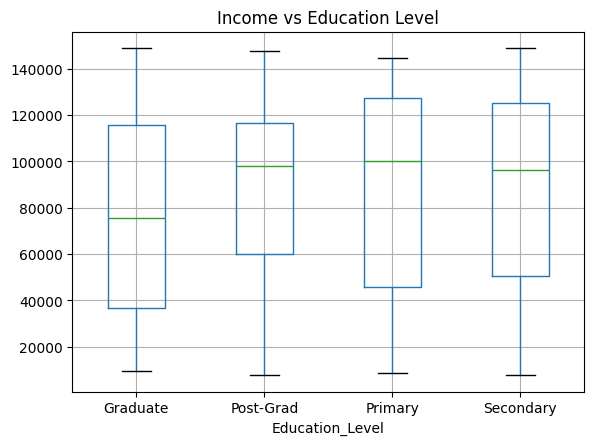

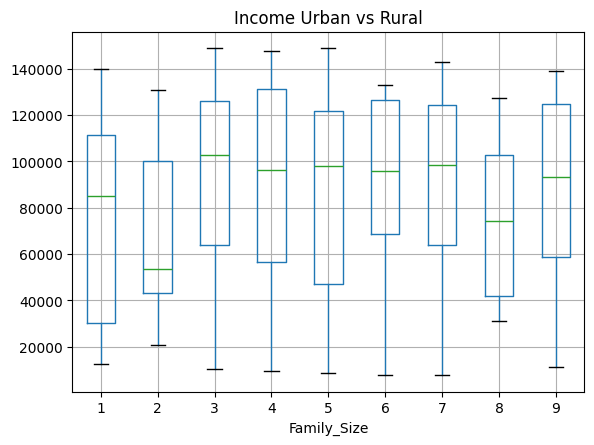

In [42]:
df.boxplot(column="Household_Income", by="Education_Level")
plt.title("Income vs Education Level")
plt.suptitle("")
plt.show()

df.boxplot(column="Household_Income", by="Family_Size")
plt.title("Income Urban vs Rural")
plt.suptitle("")
plt.show()
